In [1]:
import pandas as pd
df = pd.read_csv('LB_Forecast_Rec_1.csv')
df.head()

,Year,Week,ds,y,Cash
0,2022,1,1/3/2022,216637.49,1347046.53
1,2022,2,1/10/2022,220001.93,1348547.51
2,2022,3,1/17/2022,186053.69,1362682.96
3,2022,4,1/24/2022,291930.41,1297296.15
4,2022,5,1/31/2022,298268.57,1328902.74


In [2]:
df.tail()

,Year,Week,ds,y,Cash
50,2022,51,12/23/2022,384005.37,1389907.43
51,2022,52,12/30/2022,545430.74,1338004.43
52,2023,53,1/6/2023,466460.02,1454978.00
53,2023,54,1/13/2023,400181.12,1459397.88
54,2023,55,1/20/2023,394238.05,1401274.54


In [3]:
train = df[:-4]
test = df[-4:]

In [4]:
import numpy as np

historical_mean =  np.mean(train['y'])
print(historical_mean)

347933.77627450996


In [5]:
test.loc[:, 'pred_mean'] = historical_mean

C:\Users\User\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [6]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
mape_hist_mean = mape(test['y'], test['pred_mean'])
print(mape_hist_mean)

21.605067793961304


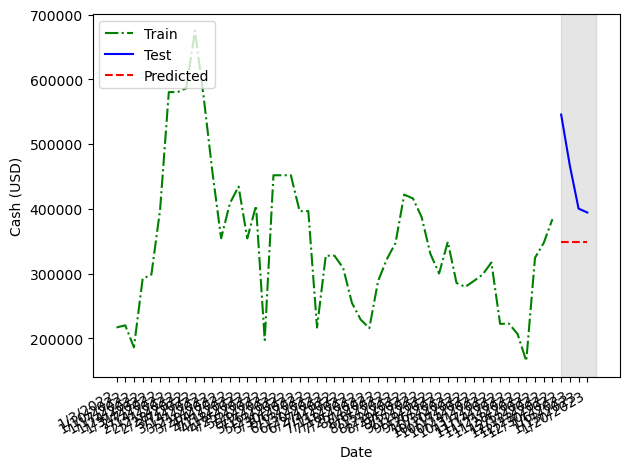

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train['ds'], train['y'], 'g-.', label='Train')
ax.plot(test['ds'], test['y'], 'b-', label='Test')
ax.plot(test['ds'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Cash (USD)')
ax.axvspan(51, 55, color='#808080', alpha=0.2)
ax.legend(loc=2)



fig.autofmt_xdate()
plt.tight_layout()